In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pywt
from scipy import signal
from scipy.optimize import curve_fit
from lmfit.models import GaussianModel

In [488]:
df=pd.read_csv('4_Chest_sweater.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

Log Mode  Log Freq   Timestamp     AccX     AccY     AccZ      GyroX  \
0             5       100  1555414552  687.836  380.823  580.354  -7.926829   
1             5       100  1555414552 -812.703 -108.946  726.876 -11.707320   
2             5       100  1555414552 -812.520 -108.824  733.952 -37.073170   
3             5       100  1555414552 -787.144  -45.628  616.954 -56.341460   
4             5       100  1555414552 -800.259 -137.433  411.689  -1.097561   
...         ...       ...         ...      ...      ...      ...        ...   
14933         5       100  1555415471 -890.722  -81.008  446.764  -2.682927   
14934         5       100  1555415471 -885.964  -76.006  459.025  -3.902439   
14935         5       100  1555415471 -879.681  -77.714  475.068  -3.048780   
14936         5       100  1555415471 -894.992  -76.311  502.701   0.121951   
14937         5       100  1555415471 -889.319  -90.951  471.835   3.536585   

            GyroY      GyroZ  MagnX  MagnY  MagnZ        qw        qi  \
0        8.048780   0.975610   -592    122   -113  0.788006  0.002899   
1      -81.829270   8.780488    125     60   -128  0.183978 -0.428877   
2     -145.487800  14.756100    123     59   -136  0.128994 -0.427229   
3     -174.634200  23.048780    118     58   -145  0.113618 -0.421033   
4       37.073170   1.341463    113     57   -157  0.107202 -0.424787   
...           ...        ...    ...    ...    ...       ...       ...   
14933    2.926829   0.365854    144     47    -50  0.017279  0.534410   
14934    3.292683   0.365854    146     45    -51  0.016416  0.535050   
14935    2.804878   0.365854    144     46    -54  0.015920  0.534349   
14936    1.463415   0.609756    144     45    -53  0.015192  0.531663   
14937    0.853659   0.609756    144     45    -53  0.015803  0.530137   

             qj        qk    Time  
0     -0.432874 -0.437788    0.00  
1      0.002594  0.884426    0.01  
2      0.000702  0.894894    0.02  
3     -0.001770  0.899899    0.03  
4     -0.001251  0.898923    0.04  
...         ...       ...     ...  
14933  0.040437 -0.844081  149.33  
14934  0.041231 -0.843654  149.34  
14935  0.041780 -0.844081  149.35  
14936  0.041749 -0.845790  149.36  
14937  0.041749 -0.846736  149.37  

[14938 rows x 17 columns]

In [489]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
limits=[20,100]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

Time     AccX    AccY     AccZ     GyroX     GyroY     GyroZ
2001  20.01 -763.659 -78.629  650.992 -2.682927  3.536585 -0.121951
2002  20.02 -764.757 -68.747  671.305 -3.658537  4.268293 -0.121951
2003  20.03 -773.114 -72.285  653.737 -4.634147  4.512195 -0.365854
2004  20.04 -783.240 -71.919  664.473 -5.731708  3.658537 -0.243902
2005  20.05 -779.885 -73.810  656.238 -5.975610  2.682927 -0.365854
...     ...      ...     ...      ...       ...       ...       ...
9995  99.95 -773.175 -50.081  666.303 -2.195122  0.487805  0.609756
9996  99.96 -789.157 -56.974  645.441 -1.829268  0.975610  0.609756
9997  99.97 -781.898 -42.578  649.284 -1.707317  0.731707  0.609756
9998  99.98 -768.051 -46.970  640.622 -2.682927  0.731707  0.609756
9999  99.99 -771.406 -39.528  648.247 -3.292683  0.731707  0.609756

[7999 rows x 7 columns]

## Plots

<IPython.core.display.Javascript object>


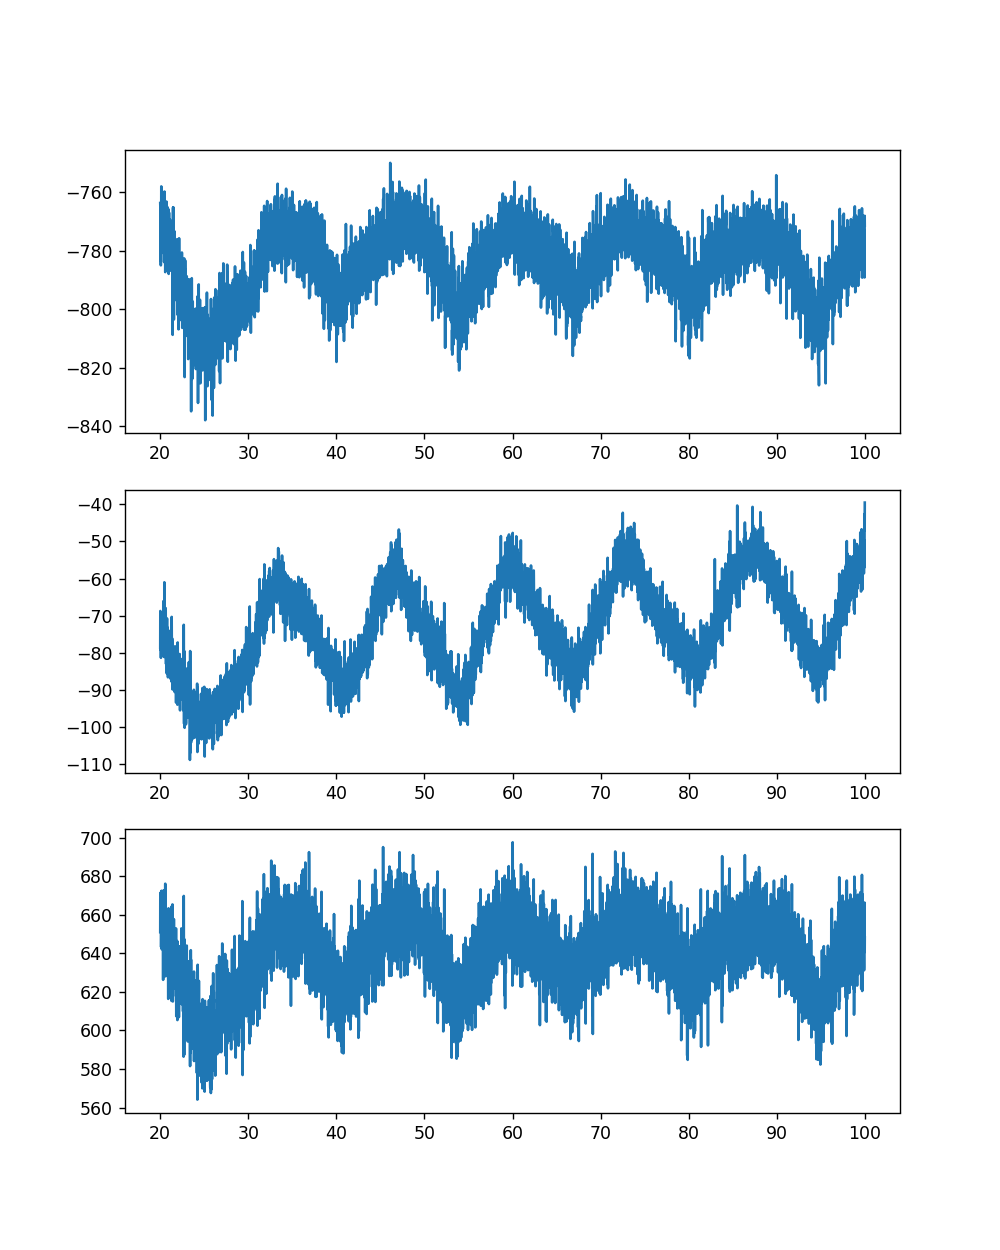

In [490]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])


<IPython.core.display.Javascript object>


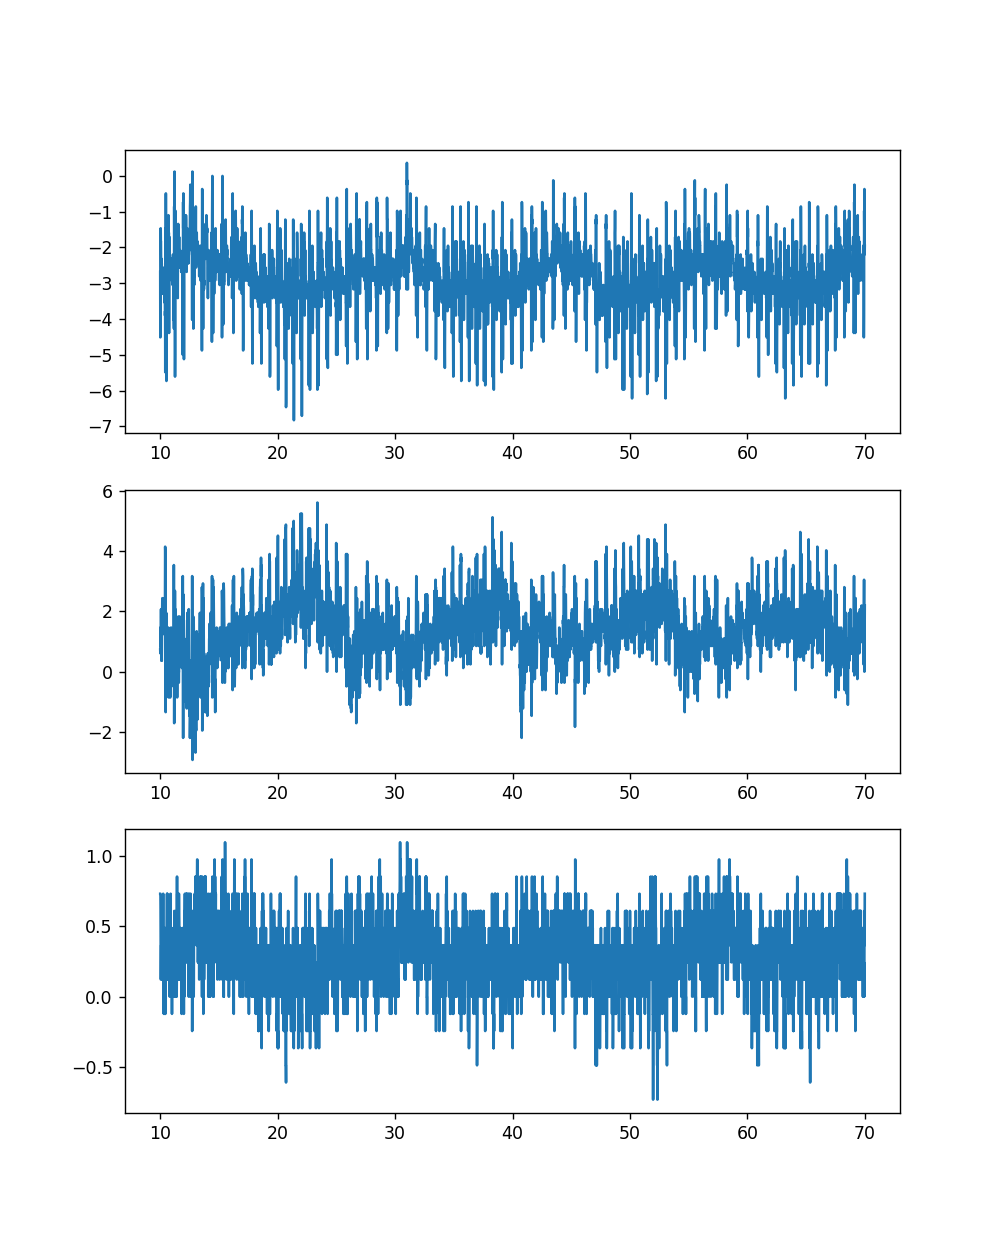

In [234]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'])
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])


<IPython.core.display.Javascript object>


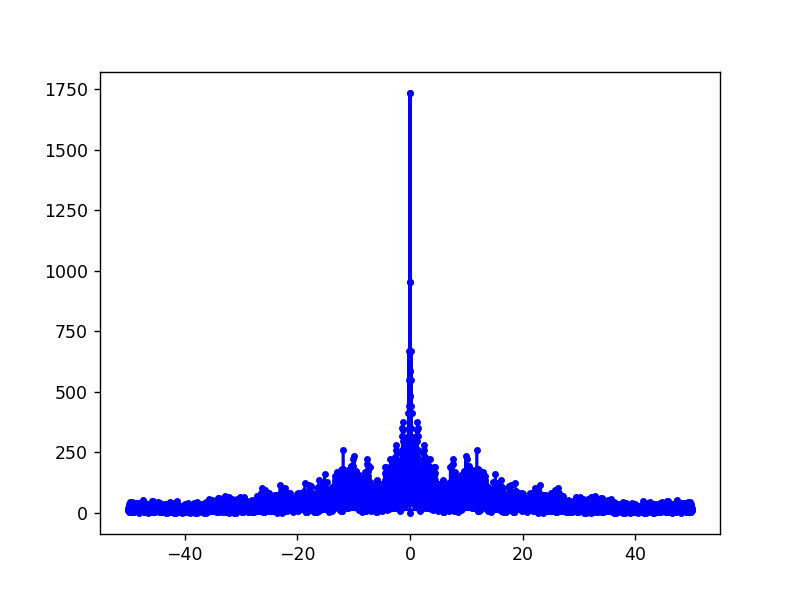

In [229]:

gyroxfreq=np.fft.fft(Df['GyroY']-np.mean(Df['GyroY']))
freq=np.fft.fftfreq(d=1/log_freq, n=len(gyroxfreq))

%matplotlib notebook
plt.plot(freq,np.abs(gyroxfreq),'b-o', markersize=3)
#plt.xlim(-0.001,2)

## wavelet filtering

In [ ]:
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)
#compression
div=0.1
for j in range(len(coeff)):
    mean=np.mean(coeff[j])
    coeff[j][coeff[j]<mean/div]=coeff[j][coeff[j]<mean/div]+(mean-coeff[j][coeff[j]<mean/div])
    
coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
coeff
plt.figure()
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y[:-1],label='compressed')
plt.legend()
# plt.figure()
# #plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

<IPython.core.display.Javascript object>


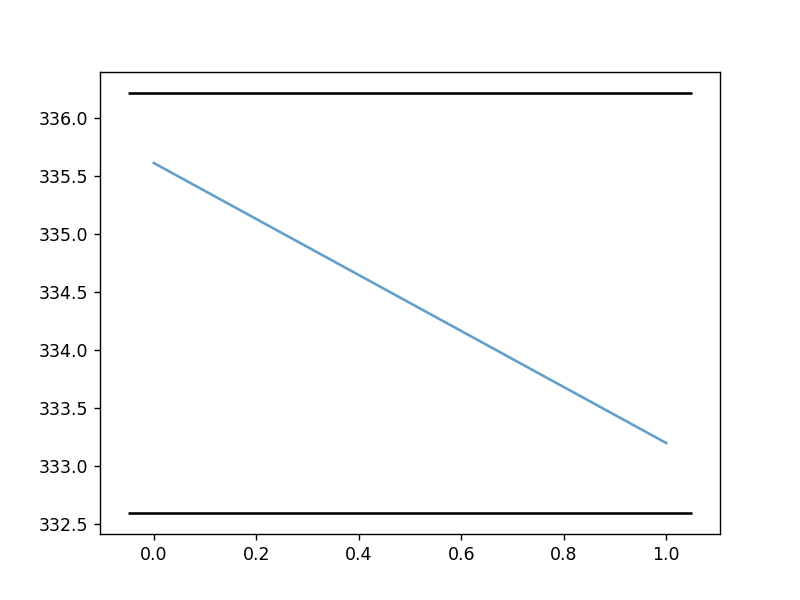

<IPython.core.display.Javascript object>


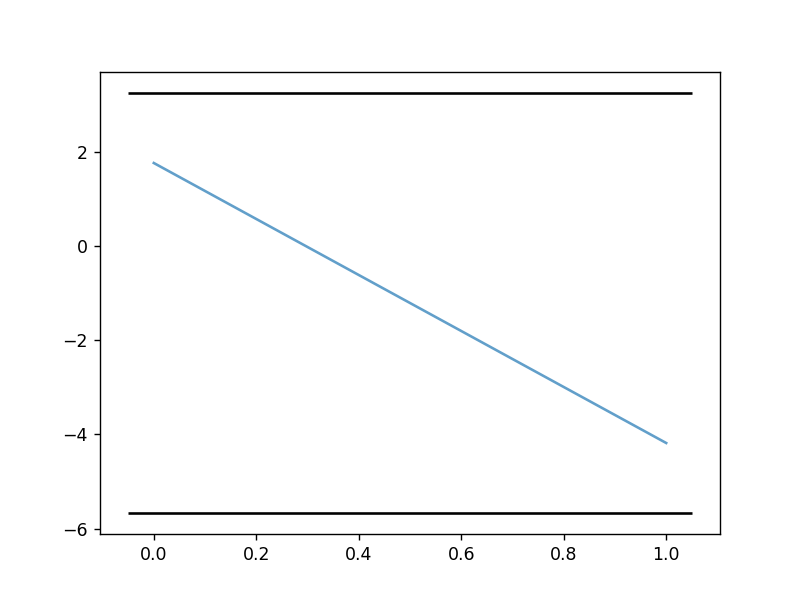

<IPython.core.display.Javascript object>


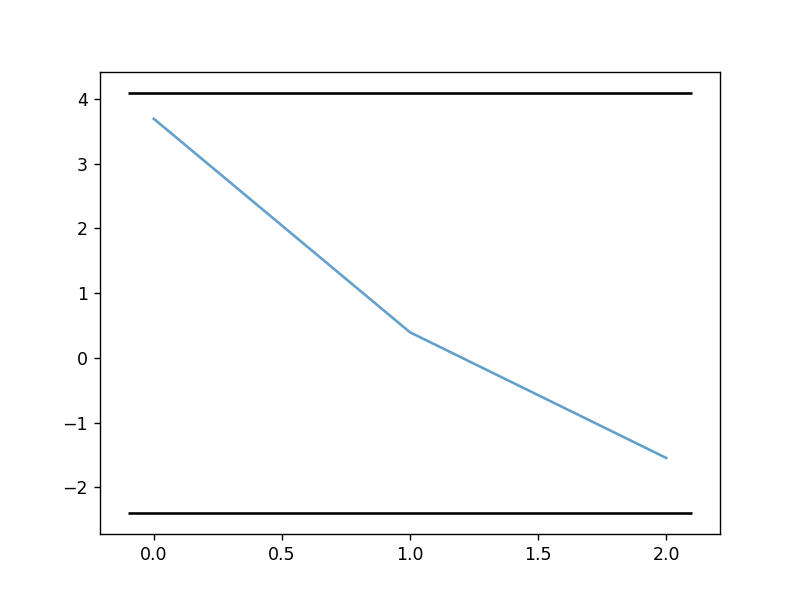

<IPython.core.display.Javascript object>


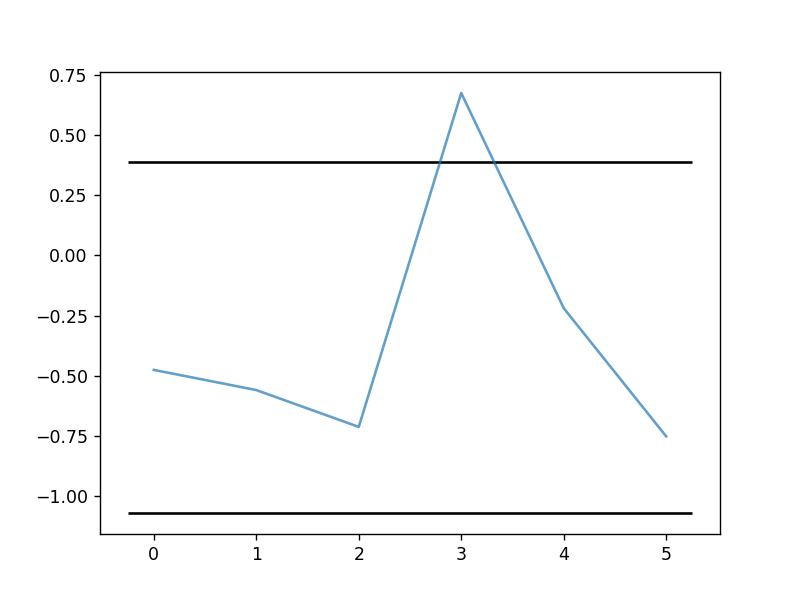

<IPython.core.display.Javascript object>


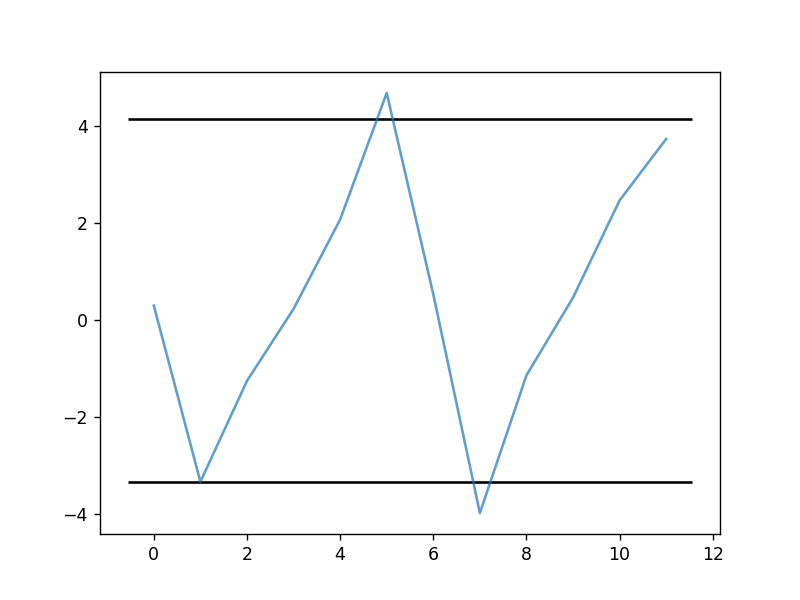

<IPython.core.display.Javascript object>


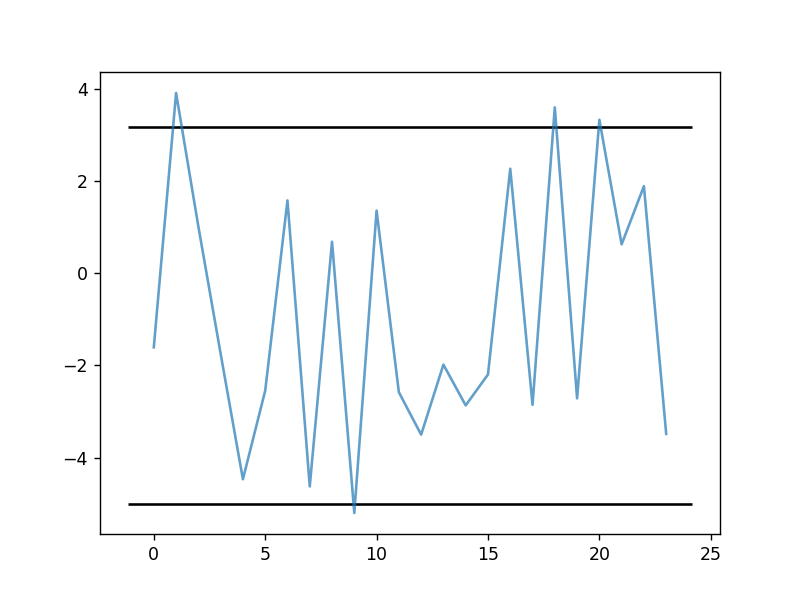

<IPython.core.display.Javascript object>


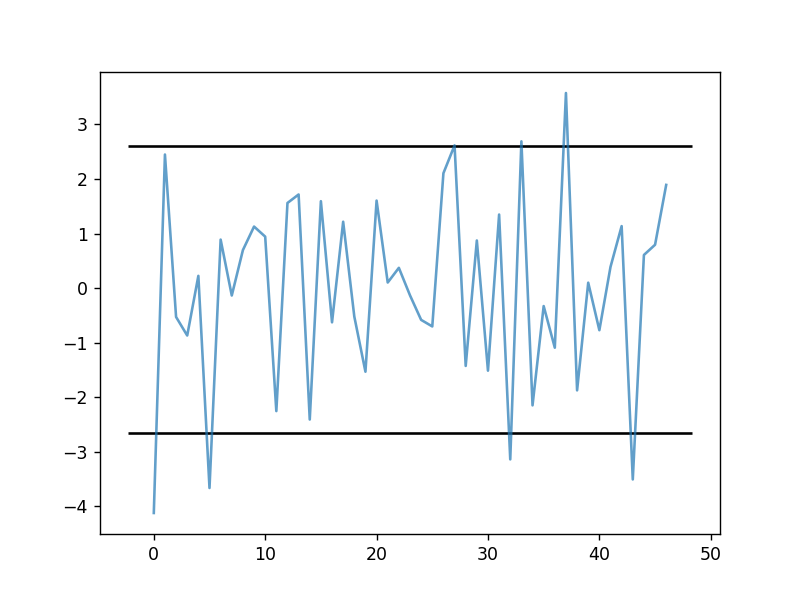

<IPython.core.display.Javascript object>


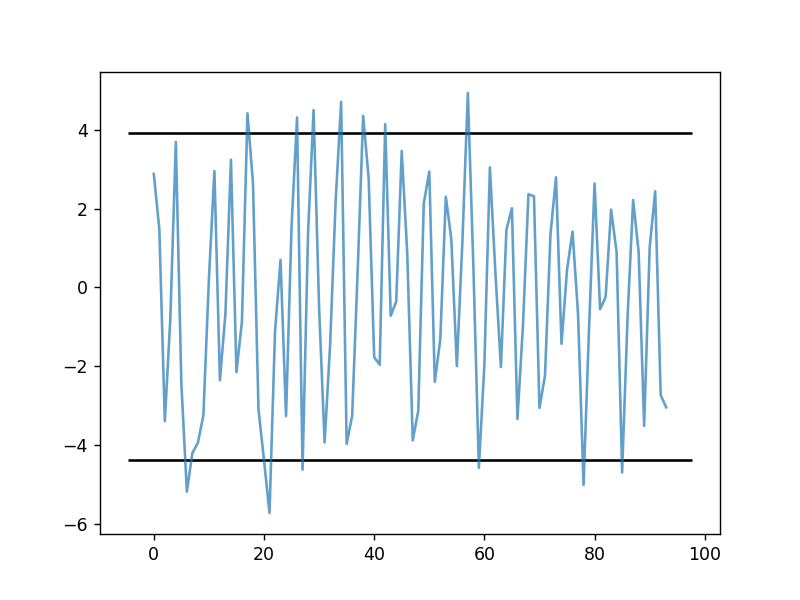

<IPython.core.display.Javascript object>


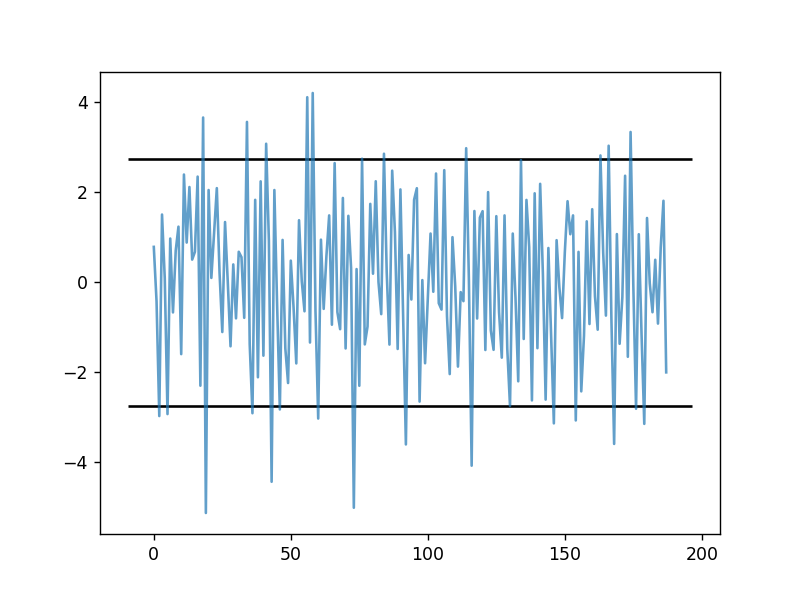

<IPython.core.display.Javascript object>


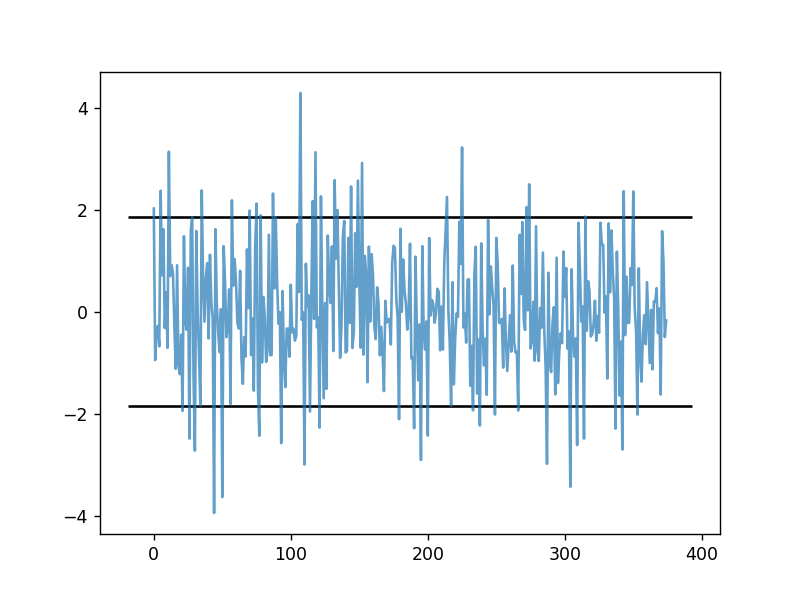

<IPython.core.display.Javascript object>


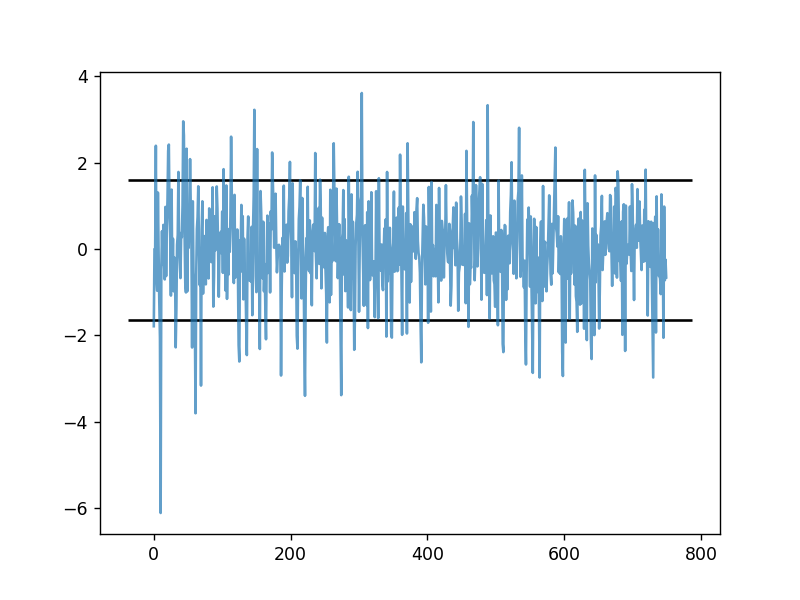

<IPython.core.display.Javascript object>


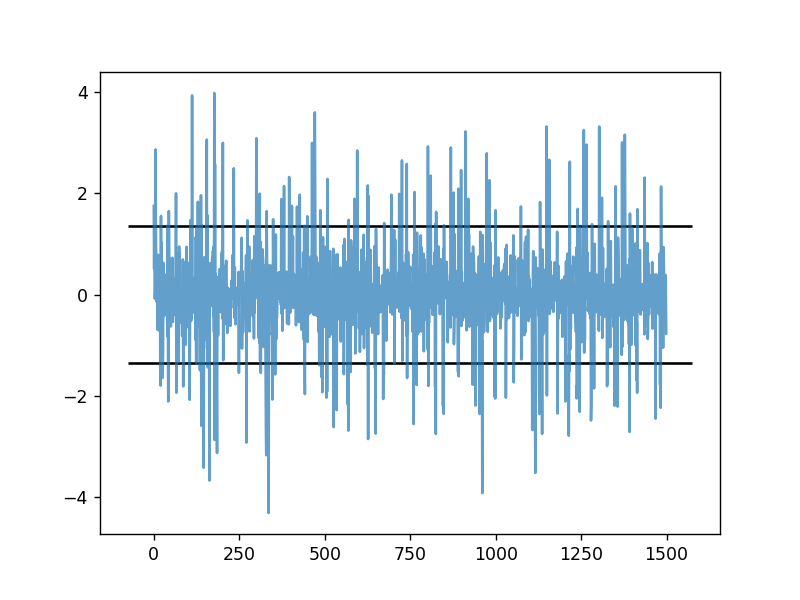

<IPython.core.display.Javascript object>


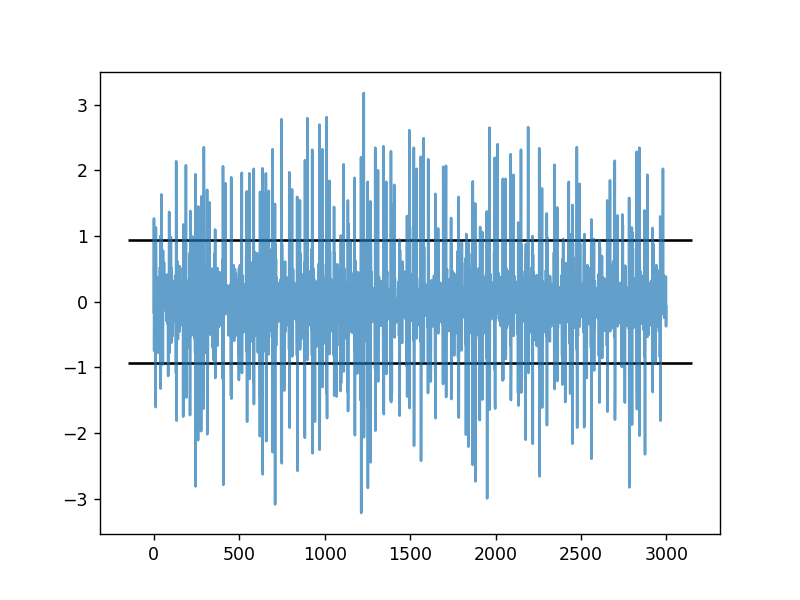

<IPython.core.display.Javascript object>


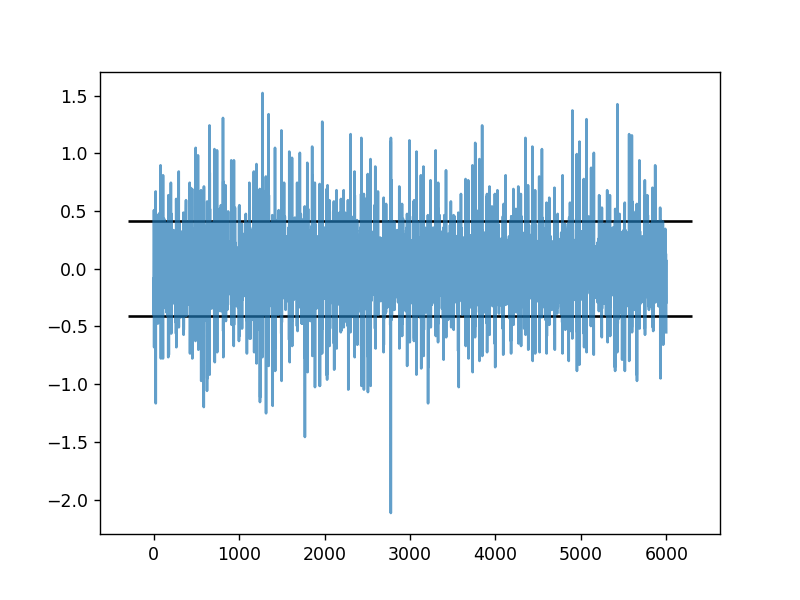

In [442]:
#denoising
coeff=pywt.wavedec(Df['GyroY'],'db1',mode='periodic')
coeff=np.array(coeff)


coeff=list(coeff)
y=pywt.waverec(coeff,'db1',mode='periodic')
#coeff, len(coeff)
# plt.figure()
# plt.plot(Df['Time'],Df['GyroY'], label='original')
# plt.plot(Df['Time'],y[:-1],label='compressed')
# plt.legend()

a=[1**(i) for i in np.arange(len(coeff)-1,-1,-1)]
coeff=np.array(coeff)
for idx in range(len(coeff)):
    plt.figure()
    plt.plot(coeff[idx],alpha=0.7)
    lim=plt.xlim()
    threshold_high=np.mean(coeff[idx])+1.5*a[idx]*np.std(coeff[idx])
    threshold_low=np.mean(coeff[idx])-1.5*a[idx]*np.std(coeff[idx])
    plt.hlines(threshold_high,lim[0],lim[1])
    plt.hlines(threshold_low,lim[0],lim[1])
    coeff[idx][np.bitwise_and(coeff[idx]<threshold_high,coeff[idx]>threshold_low)]=0


<IPython.core.display.Javascript object>


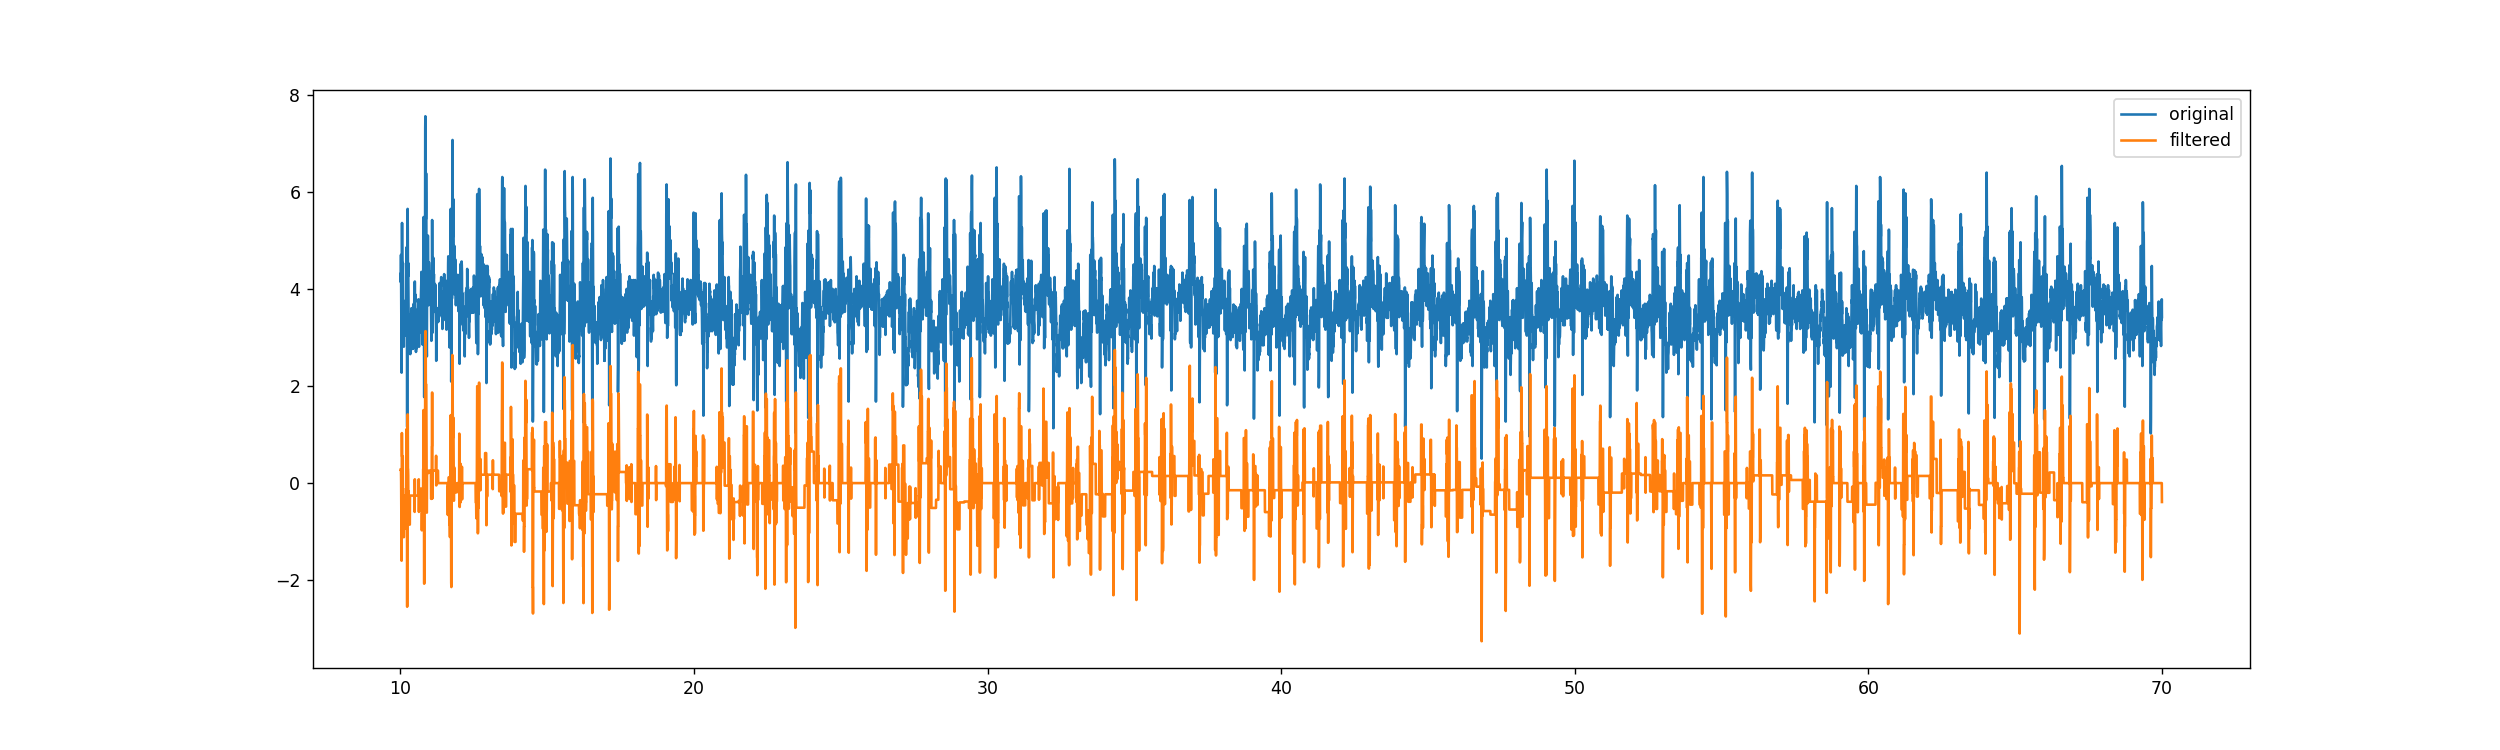

In [443]:
y1=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroY'], label='original')
plt.plot(Df['Time'],y1[:-1],label='filtered')
plt.legend()

<IPython.core.display.Javascript object>


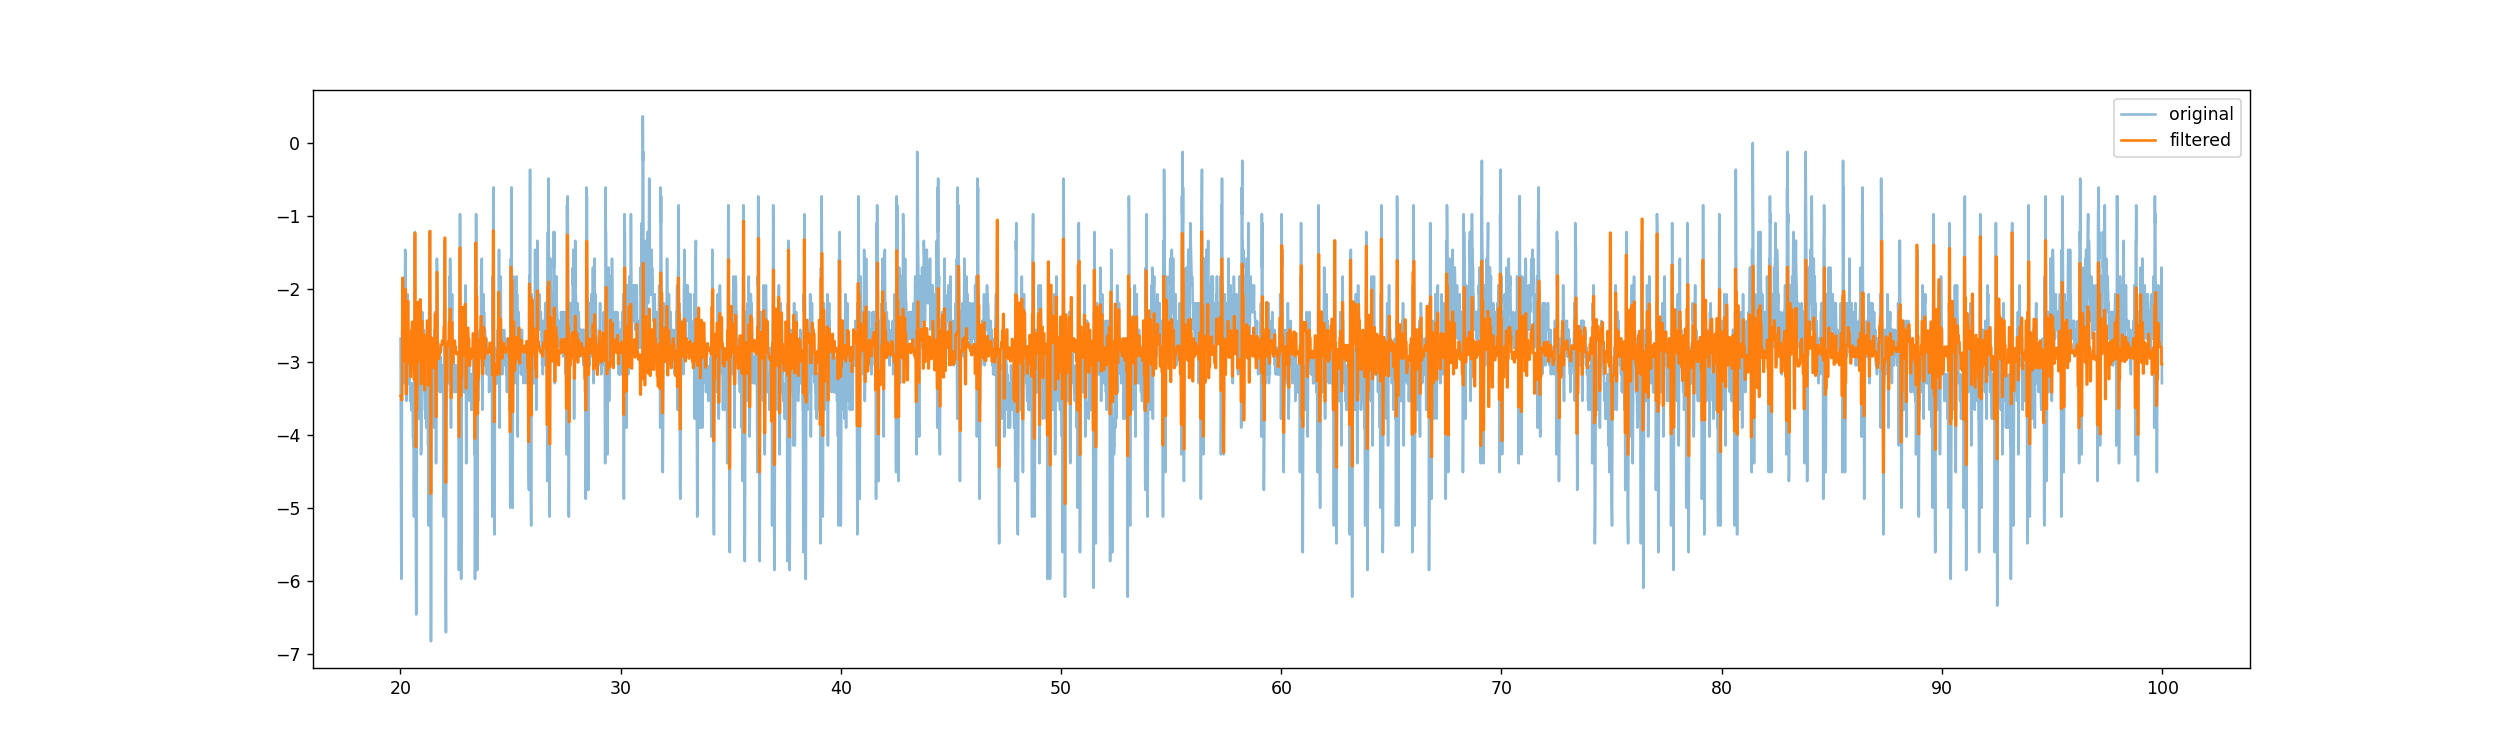

In [547]:
coeff=pywt.wavedec(Df['GyroX'],'haar',mode='periodic')

low_cut = 9   #included in the pass_band
high_cut = 11  #excluded

coeff=np.array(coeff)
for i in np.arange(high_cut,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,low_cut):
    coeff[j]=np.zeros(len(coeff[j])) 

# for k in [9]:
#     coeff[k]=coeff[k]*5
    

y2=pywt.waverec(list(coeff),'haar',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroX'], label='original', alpha=0.5)
plt.plot(Df['Time'],y2[:-1],label='filtered')
plt.legend()

In [540]:
#frequency range calculation
print(len(coeff))
freq_range=np.ceil(max(freq))
higher_filtered =freq_range/2**(len(coeff)-high_cut)
lower_filtered  =freq_range/2**(len(coeff)-low_cut)
lower_filtered, higher_filtered

13


(0.78125, 25.0)

<IPython.core.display.Javascript object>


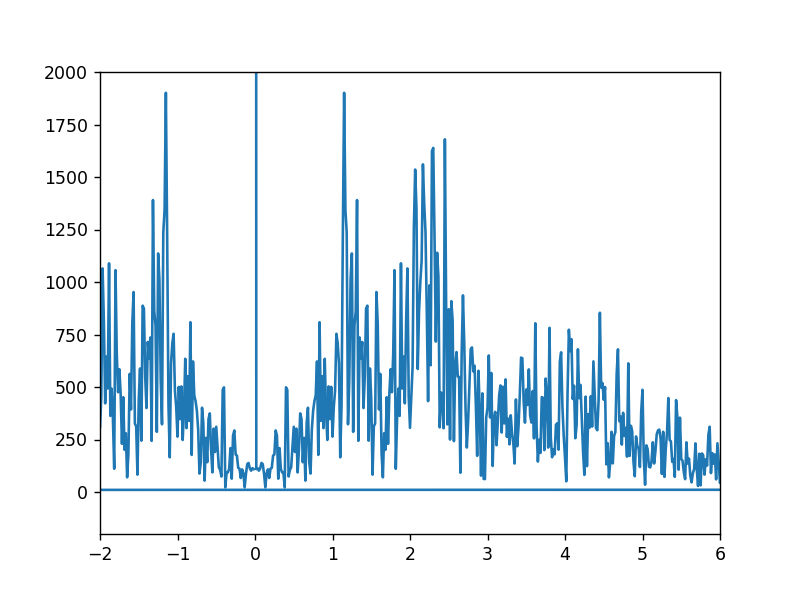

first HR:  69.0


In [402]:
filtered_freq=np.fft.fft(y2)#-np.mean(Df['GyroY']))
freq=np.fft.fftfreq(d=1/log_freq, n=len(filtered_freq)) 

%matplotlib notebook
plt.plot(freq,np.abs(filtered_freq))
plt.xlim(-2,6)
plt.ylim(-200,2000)
print("first HR: ", freq[np.argmax(np.abs(filtered_freq)[1:int(len(freq)/2)])+1]*60)

In [85]:
freq,np.abs(filtered_freq)

(array([ 0.        ,  0.01538462,  0.03076923, ..., -0.04615385,
        -0.03076923, -0.01538462]),
 array([4.82517379e+04, 3.04330393e+01, 1.96051889e+01, ...,
        2.23886958e+01, 1.96051889e+01, 3.04330393e+01]))

## Set 1

In [160]:
df=pd.read_csv('1_Stave_supine_static.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

Log Mode  Log Freq   Timestamp     AccX     AccY      AccZ     GyroX  \
0            5       100  1555487493  490.379  308.172   863.028 -40.73171   
1            5       100  1555487493   32.513  230.153  1015.406  23.90244   
2            5       100  1555487493   36.539  256.200  1012.051 -21.46342   
3            5       100  1555487493   65.331  241.194  1013.454 -30.24390   
4            5       100  1555487493   19.337  250.649  1004.121 -35.73171   
...        ...       ...         ...      ...      ...       ...       ...   
9165         5       100  1555487805   75.274 -682.590   664.778  34.14634   
9166         5       100  1555487805  131.760 -664.717   704.428  35.12195   
9167         5       100  1555487805  168.665 -679.479   751.581  36.70732   
9168         5       100  1555487805  204.472 -709.491   826.794  40.12195   
9169         5       100  1555487805  819.657 -365.268   103.090  66.09756   

          GyroY       GyroZ  MagnX  MagnY  MagnZ        qw        qi  \
0     30.975610   45.853660   -642    -90    -83  0.182482  0.375561   
1     25.609760   40.731710   -177   -185   -321  0.910500  0.099033   
2      3.780488   11.219510   -179   -185   -325  0.881061  0.112613   
3     11.219510    6.341464   -180   -185   -325  0.877629  0.112827   
4     12.926830    0.975610   -178   -182   -328  0.876462  0.111820   
...         ...         ...    ...    ...    ...       ...       ...   
9165  31.585370  -59.146340   -142    257   -480  0.153829 -0.093692   
9166  21.097560  -68.292690   -138    255   -482  0.148201 -0.093112   
9167  17.682930  -76.097560   -142    254   -479  0.142147 -0.093326   
9168  18.170730  -87.195120   -139    253   -479  0.135352 -0.093844   
9169   5.731708 -107.682900   -140    248   -481  0.126385 -0.092441   

            qj        qk   Time  
0     0.139683  0.897855   0.00  
1     0.037385  0.399731   0.01  
2     0.042390  0.457442   0.02  
3     0.042695  0.463912   0.03  
4     0.042726  0.466353   0.04  
...        ...       ...    ...  
9165  0.324564 -0.928556  91.65  
9166  0.321390 -0.930631  91.66  
9167  0.317850 -0.932768  91.67  
9168  0.314005 -0.935026  91.68  
9169  0.307810 -0.938475  91.69  

[9170 rows x 17 columns]

In [161]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
limits=[18,80.5]    #set 1
#limits=[4,68]       #set 3
#limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

Time    AccX    AccY     AccZ     GyroX     GyroY     GyroZ
1801  18.01  37.881  18.666 -929.030 -2.560976  1.829268  0.121951
1802  18.02  35.380  23.729 -924.638 -2.560976  1.585366  0.243902
1803  18.03  47.519  20.679 -949.343 -2.682927  1.585366  0.365854
1804  18.04  38.186  22.265 -947.391 -2.439024  1.829268  0.365854
1805  18.05  46.909  25.864 -926.834 -2.439024  1.585366  0.365854
...     ...     ...     ...      ...       ...       ...       ...
8045  80.45  42.090  22.631 -907.802 -2.439024  1.463415  0.243902
8046  80.46  44.957  19.093 -914.573 -2.560976  1.341463  0.365854
8047  80.47  53.497  18.727 -940.376 -2.682927  1.585366  0.121951
8048  80.48  42.944  19.886 -932.629 -2.804878  1.585366  0.243902
8049  80.49  50.081  19.703 -914.207 -2.560976  1.707317  0.243902

[6249 rows x 7 columns]

<IPython.core.display.Javascript object>


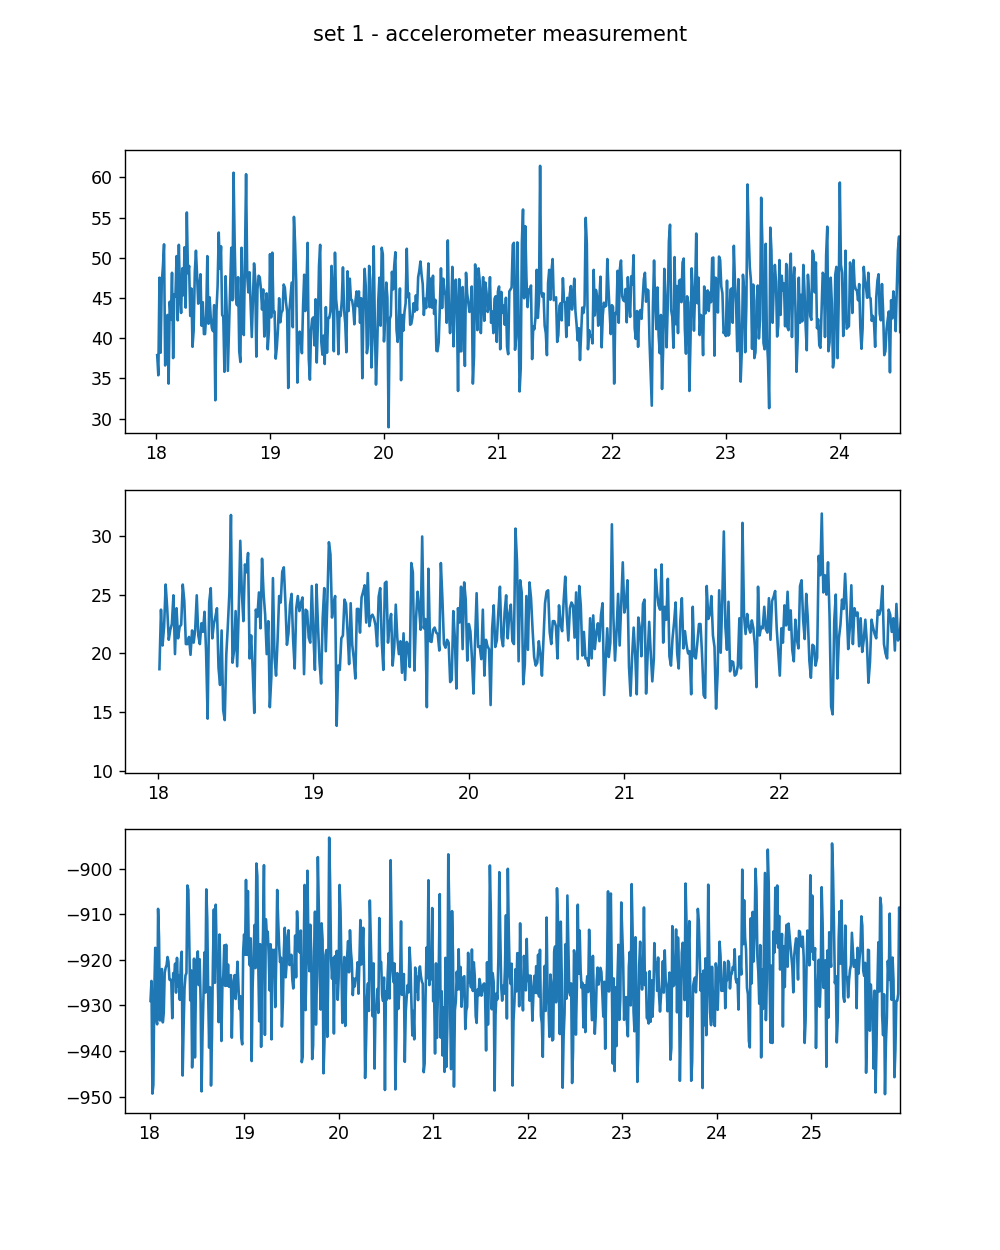

Text(0.5, 0.98, 'set 1 - accelerometer measurement')

In [162]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])
fig.suptitle("set 1 - accelerometer measurement")


<IPython.core.display.Javascript object>


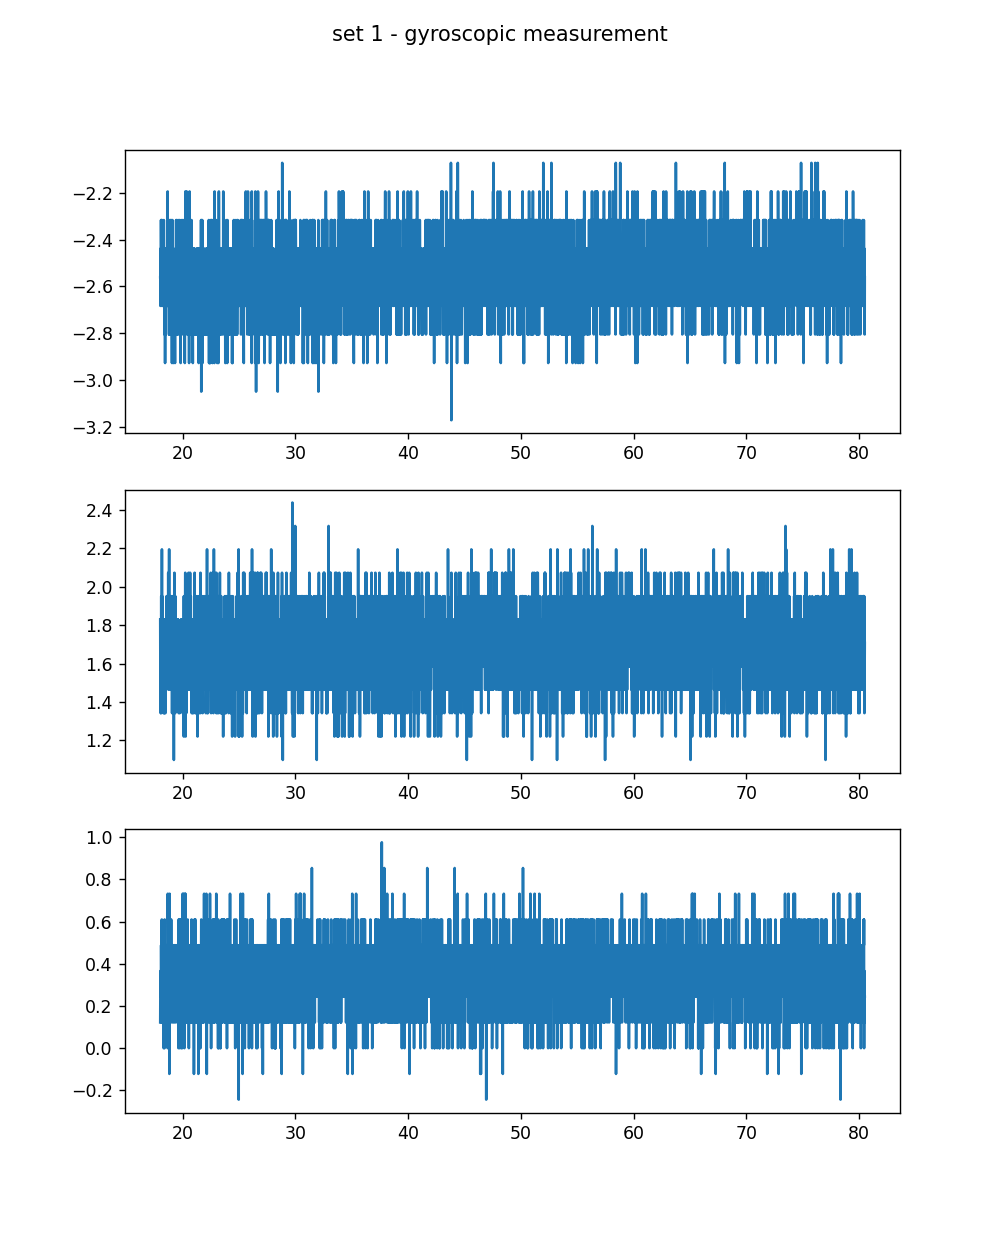

Text(0.5, 0.98, 'set 1 - gyroscopic measurement')

In [163]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'],label='')
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])
fig.suptitle("set 1 - gyroscopic measurement")

## Set 3

In [155]:
df=pd.read_csv('3_Subject_sitting_chair.txt',sep='\t')

log_freq=df['Log Freq'][0]
a=df['Log Freq']!=df['Log Freq'][0]

if sum(a)==0:
    df['Time']=np.arange(0,len(df['qi']))/df['Log Freq'][0]
    log_freq=df['Log Freq'][0]
df

Log Mode  Log Freq   Timestamp     AccX     AccY      AccZ     GyroX  \
0            5       100  1555432128  -32.940  132.309  1385.676  2.926829   
1            5       100  1555432128  139.080  -31.659  1044.259  1.341463   
2            5       100  1555432128   15.311  -33.184  1025.227 -3.902439   
3            5       100  1555432128   13.847  -35.807  1017.480 -4.024390   
4            5       100  1555432128    8.052  -35.258  1018.456 -2.560976   
...        ...       ...         ...      ...      ...       ...       ...   
6981         5       100  1555432196   -8.235  -20.252  1008.513 -3.170732   
6982         5       100  1555432196   -0.793  -16.836  1009.428 -3.170732   
6983         5       100  1555432196    1.708  -23.363  1016.870 -3.414634   
6984         5       100  1555432196    3.477  -22.143  1015.345 -3.414634   
6985         5       100  1555432196   -2.806  -18.422  1031.815 -3.902439   

         GyroY     GyroZ  MagnX  MagnY  MagnZ        qw        qi        qj  \
0    -9.024390 -6.463415   -156     28   -227  0.814846  0.039003 -0.048311   
1     1.341463  0.365854   -156     29   -229  0.790196  0.041566 -0.051118   
2     0.975610  0.365854   -154     29   -228  0.785478  0.041871 -0.051576   
3     1.219512  0.243902   -155     29   -227  0.783404  0.041841 -0.051759   
4     1.829268  0.121951   -155     29   -227  0.782211  0.041932 -0.051851   
...        ...       ...    ...    ...    ...       ...       ...       ...   
6981  1.341463  0.121951   -151     26   -223  0.779997 -0.000336  0.001434   
6982  1.463415  0.487805   -153     25   -221  0.779996 -0.000336  0.001495   
6983  1.341463  0.365854   -151     24   -222  0.779972 -0.000549  0.001312   
6984  1.097561  0.487805   -155     25   -222  0.779973 -0.000549  0.001129   
6985  1.097561  0.365854   -152     23   -223  0.779972 -0.000671  0.001221   

            qk   Time  
0    -0.576342   0.00  
1    -0.609302   0.01  
2    -0.615314   0.02  
3    -0.617939   0.03  
4    -0.619434   0.04  
...        ...    ...  
6981 -0.625782  69.81  
6982 -0.625782  69.82  
6983 -0.625812  69.83  
6984 -0.625813  69.84  
6985 -0.625812  69.85  

[6986 rows x 17 columns]

In [156]:
Df=df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']]
#limits=[18,80.5]    #set 1
limits=[4,68]       #set 3
#limits=[6,71]       #set 0
 
a=Df['Time']>limits[0]
b=Df['Time']<limits[1]
mask=np.where(a&b)

Df=Df[['Time','AccX','AccY','AccZ','GyroX','GyroY','GyroZ']].iloc[mask]
Df

Time    AccX    AccY      AccZ     GyroX     GyroY     GyroZ
401    4.01  16.531 -36.905  1004.487 -2.682927  1.707317  0.365854
402    4.02   2.989 -33.489  1023.458 -2.560976  1.341463  0.365854
403    4.03  10.858 -37.637  1020.225 -2.682927  1.829268  0.243902
404    4.04   0.610 -35.990  1010.526 -2.926829  1.341463  0.121951
405    4.05   4.819 -35.990  1014.918 -2.804878  1.341463  0.487805
...     ...     ...     ...       ...       ...       ...       ...
6795  67.95   4.758 -30.134   996.984 -2.560976  1.341463  0.243902
6796  67.96  -0.366 -34.831  1028.826 -2.682927  1.585366  0.121951
6797  67.97   6.527 -34.160  1031.632 -2.926829  1.463415  0.000000
6798  67.98  -1.342 -39.284   994.605 -2.560976  1.585366  0.121951
6799  67.99   4.209 -30.927  1016.992 -2.560976  1.585366  0.487805

[6399 rows x 7 columns]

<IPython.core.display.Javascript object>


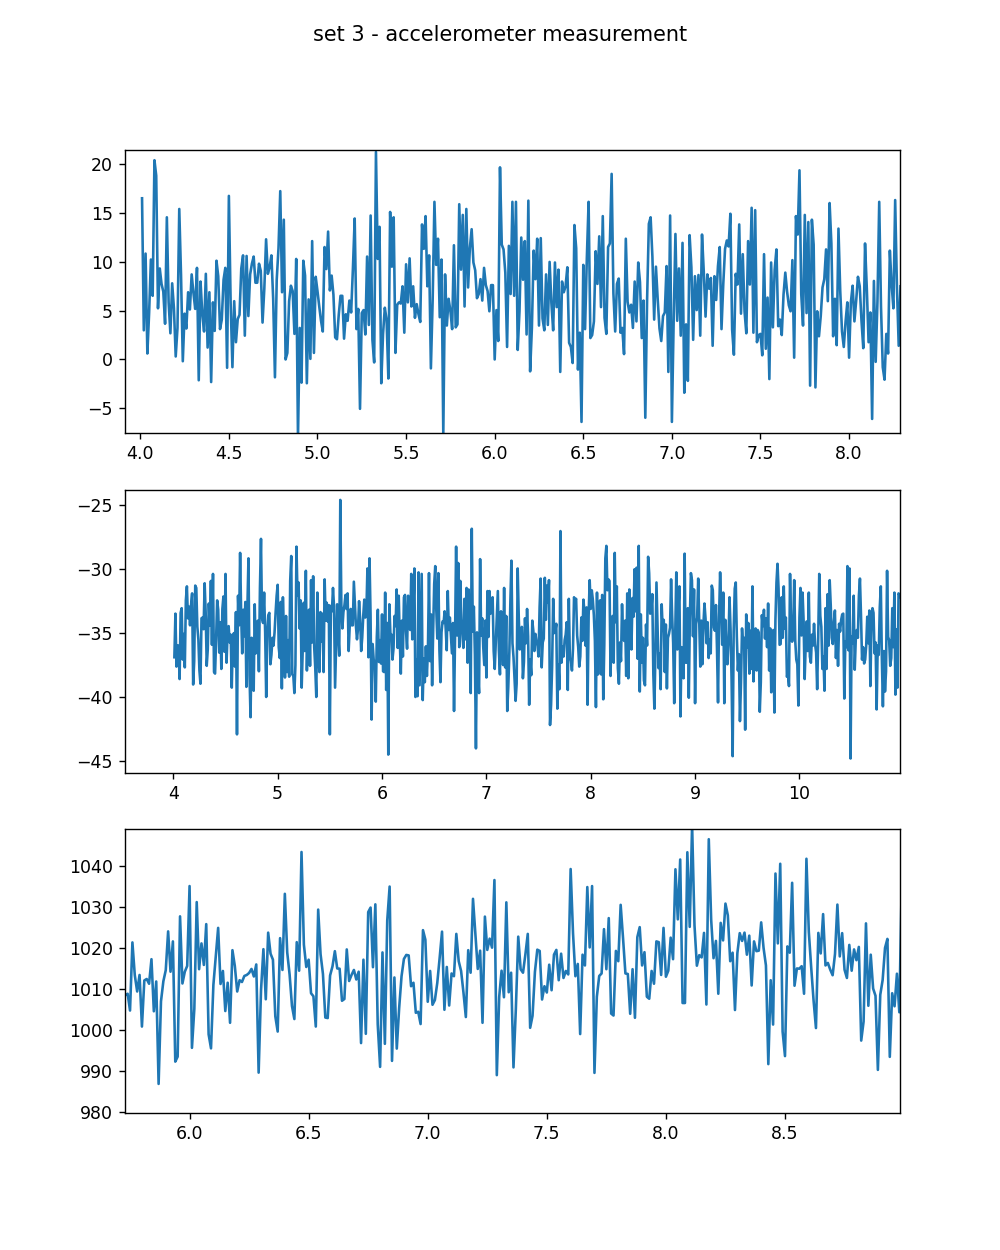

Text(0.5, 0.98, 'set 3 - accelerometer measurement')

In [157]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['AccX'])
ax[1].plot(Df['Time'],Df['AccY'])
ax[2].plot(Df['Time'],Df['AccZ'])
fig.suptitle("set 3 - accelerometer measurement")


<IPython.core.display.Javascript object>


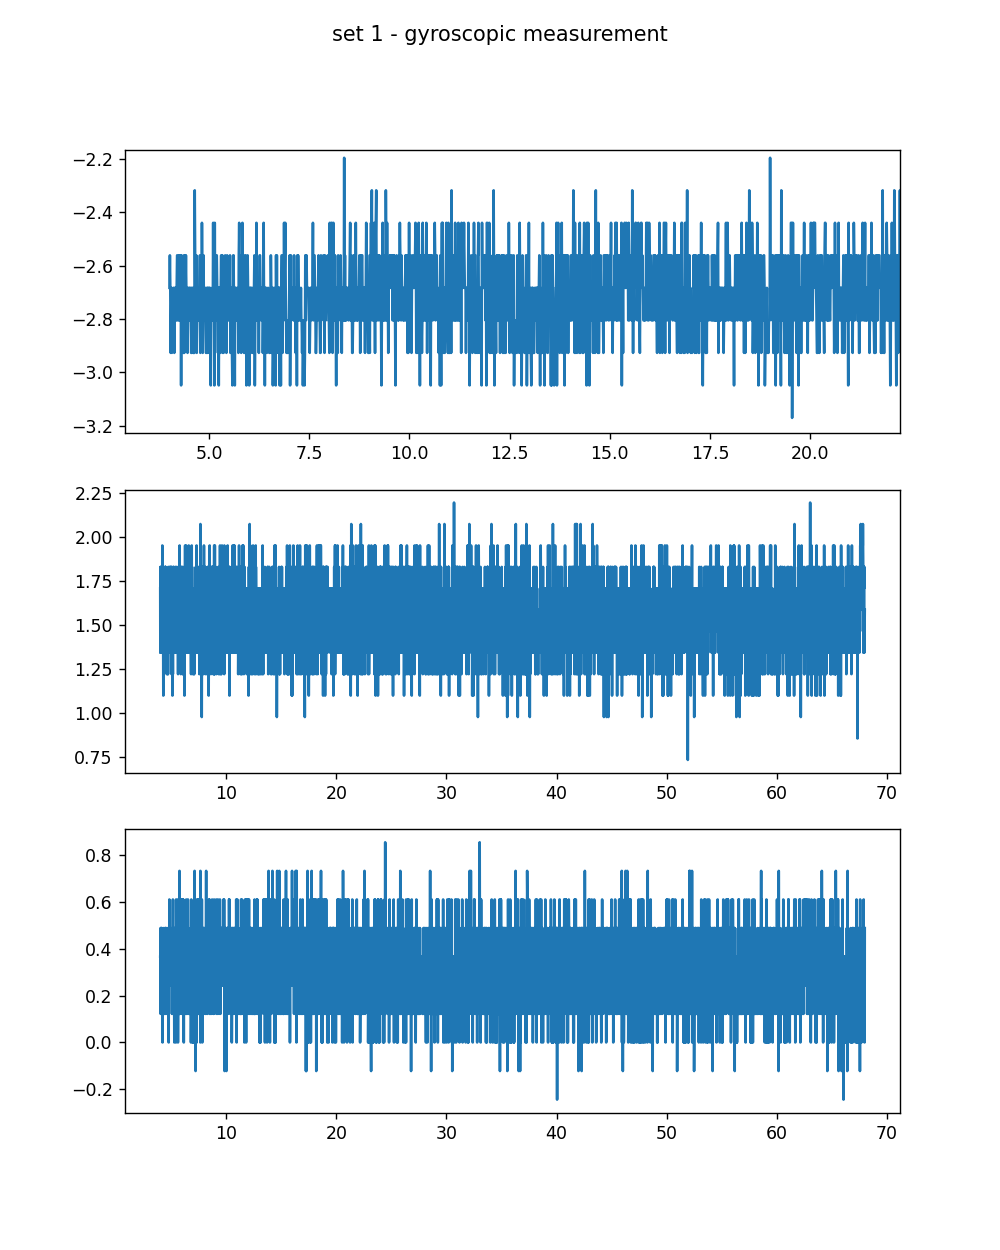

Text(0.5, 0.98, 'set 1 - gyroscopic measurement')

In [158]:
fig,ax = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
ax[0].plot(Df['Time'],Df['GyroX'],label='')
ax[1].plot(Df['Time'],Df['GyroY'])
ax[2].plot(Df['Time'],Df['GyroZ'])
fig.suptitle("set 1 - gyroscopic measurement")

<IPython.core.display.Javascript object>


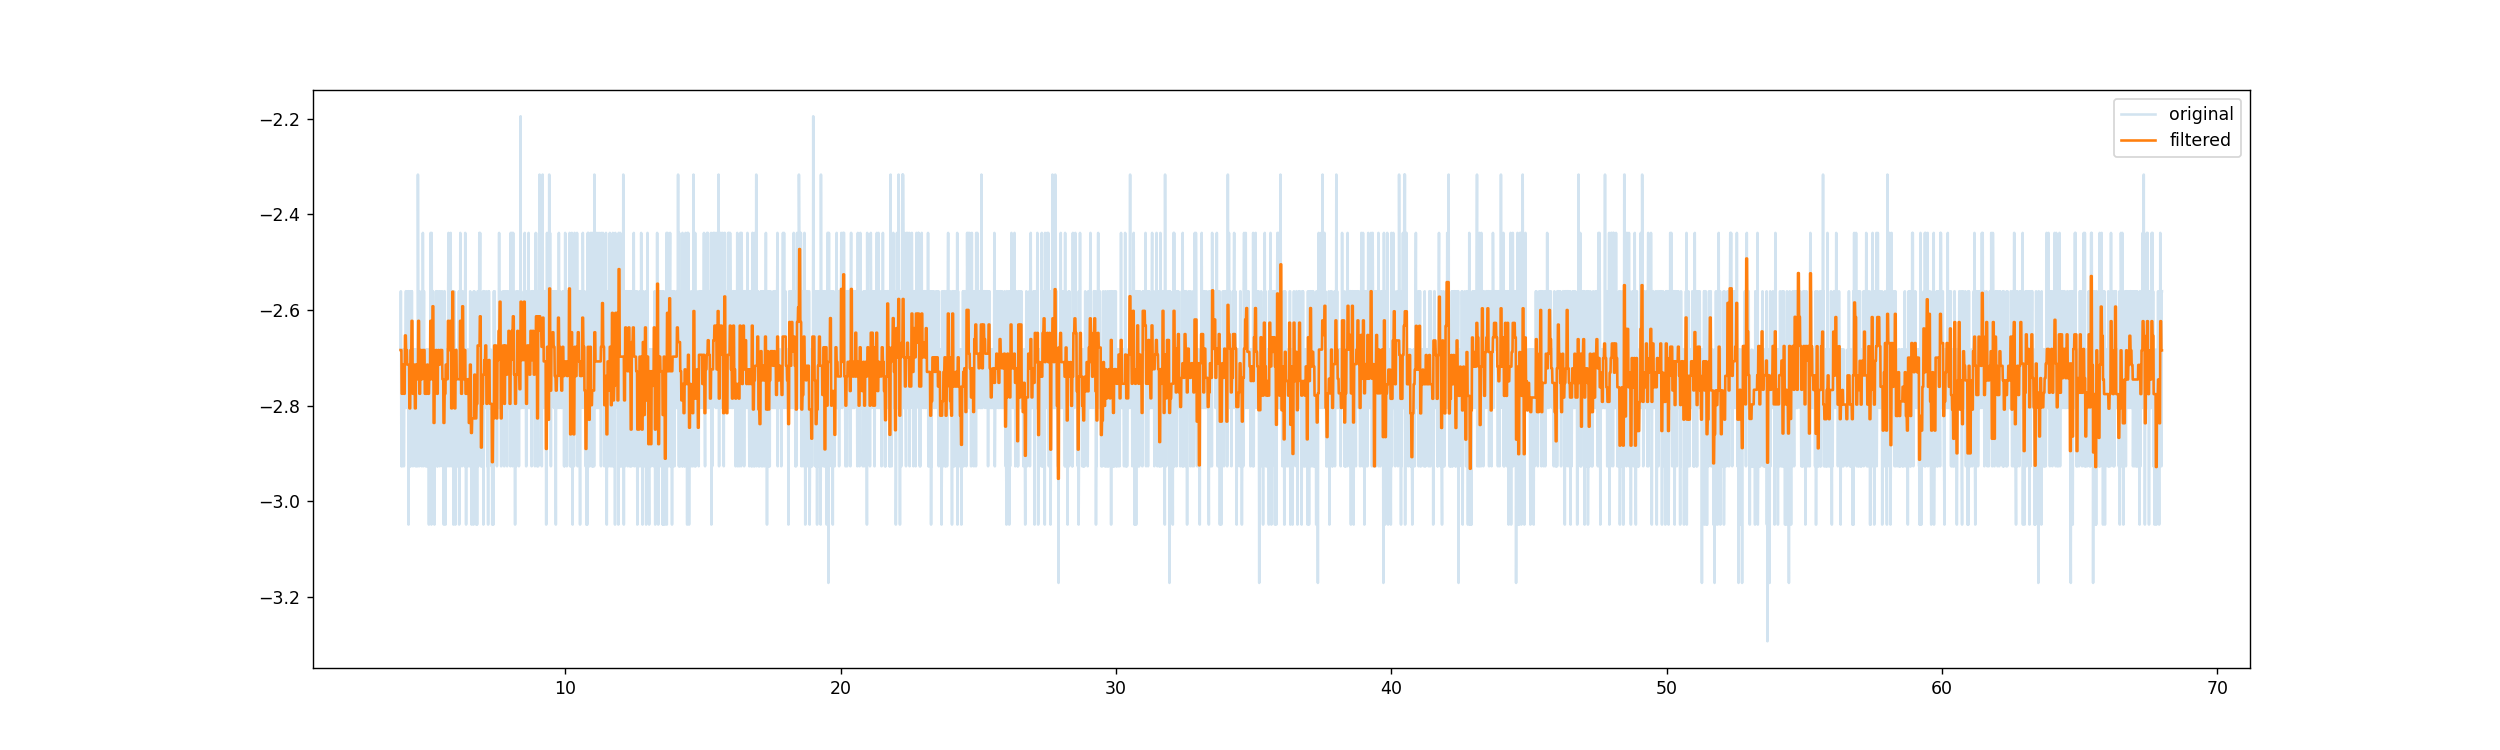

In [159]:
coeff=pywt.wavedec(Df['GyroX'],'db1',mode='periodic')

coeff=np.array(coeff)
for i in np.arange(11,len(coeff)):
    coeff[i]=np.zeros(len(coeff[i]))
    
for j in np.arange(1,5):
    coeff[j]=np.zeros(len(coeff[j])) 

y2=pywt.waverec(list(coeff),'db1',mode='periodic')
#coeff, len(coeff)
plt.figure(figsize=(20,6))
plt.plot(Df['Time'],Df['GyroX'], label='original', alpha=0.2)
plt.plot(Df['Time'],y2[:-1],label='filtered')
plt.legend()

In [ ]:
len(coeff)

## Find_peak

<IPython.core.display.Javascript object>


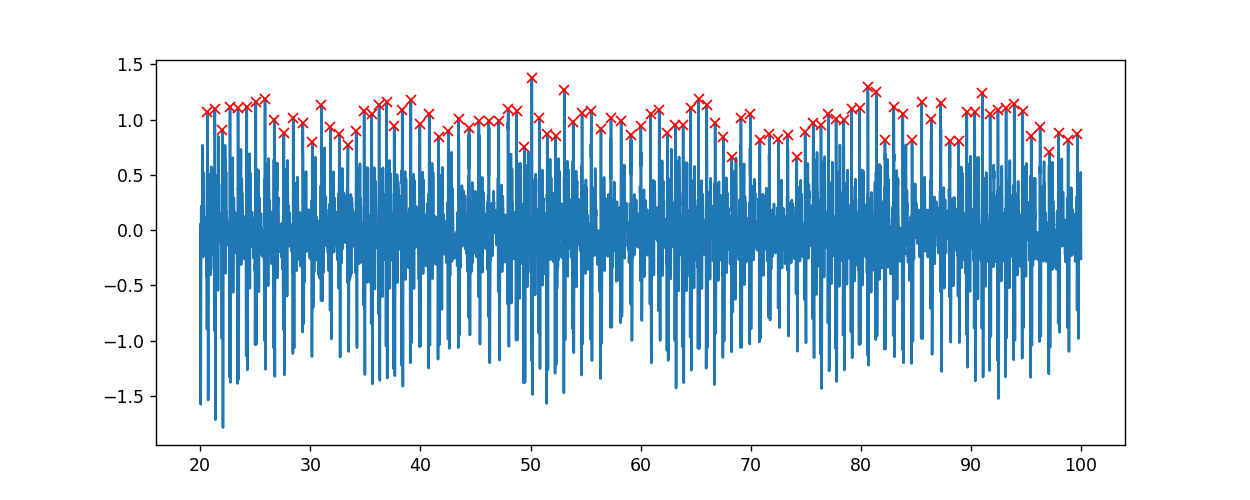

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [558]:
sign = Df['GyroX'].values#+Df['GyroZ'].values#+Df['GyroZ'].values
#sign=y2[:-1]
tras_sign = np.fft.fft(sign-sign.mean())
freq = np.fft.fftfreq(sign.shape[0], d=1/log_freq)

cut_sign = tras_sign.copy()
#cut_sign[(freq < 0.66) | (freq>90)] = 0
cut_sign[(freq < 0.6) ] = 0
new_sign = np.fft.ifft(cut_sign)

%matplotlib notebook
plt.figure(figsize=(10,4))
data = new_sign 
plt.plot(Df['Time'].values,data)
peaks,_ = signal.find_peaks(data, height=0 , distance=60,threshold=None, prominence=None)
#print(peaks)
plt.plot(Df['Time'].values[peaks],data[peaks], 'rx')
#plt.ylim(0,4)

<IPython.core.display.Javascript object>


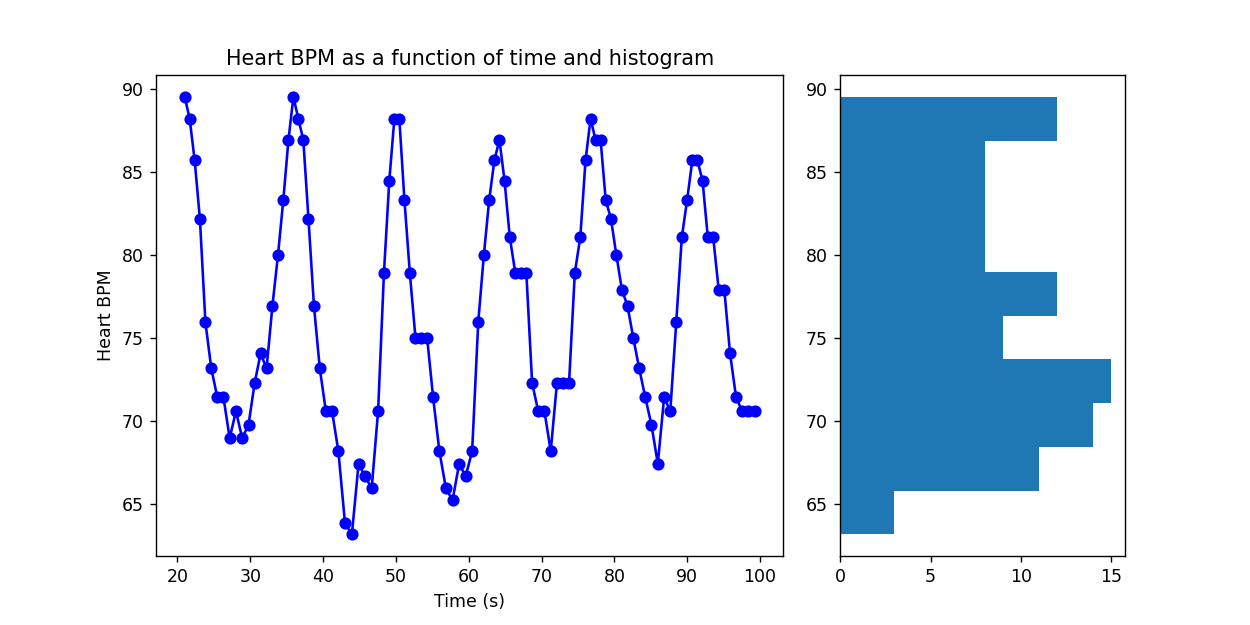

76.05675065870577 3.316265991769988
13.848846288335267 6.693531829220279


In [559]:
#histogram
from matplotlib.gridspec import GridSpec
peaks_time=Df['Time'].values[peaks]
period = peaks_time[1:]-peaks_time[:-1]
rate = 1/period*60
# h,b = np.histogram(period, bins=12)
# bins=0.5*(b[1:]+b[:-1])

fig = plt.figure(figsize=(10,5))
gs = GridSpec(3,3)

ax_main = fig.add_subplot(gs[:,:2])
ax_marg = fig.add_subplot(gs[:,2])
ax_main.plot((peaks_time[1:]+peaks_time[:-1])*0.5,rate,'b-o')
ax_main.set_xlabel('Time (s)')
ax_main.set_ylabel('Heart BPM')
ax_main.set_title('Heart BPM as a function of time and histogram')
h,b,_=ax_marg.hist(x=rate, bins=10,orientation='horizontal')
bin_center=(b[1:]+b[:-1])*0.5
#plt.setp(ax_marg.get_yticklabels(), visible=False)

# def f(x,mu,sigma,C):
#     return C*np.exp((x-mu)**2/(2*sigma**2))
#popt,pcov=curve_fit(f,bin_center,h)
mod = GaussianModel(prefix='g_')
pars = mod.guess(h, x=bin_center)
out = mod.fit(h, pars, x=bin_center)
#print(out.params)
#ax_marg.plot(out.best_fit, bin_center, 'r-', label='best fit')
print(out.params['g_center'].value, out.params['g_center'].stderr)
print(out.params['g_sigma'].value, out.params['g_sigma'].stderr)


In [556]:
np.mean(rate), np.std(rate)


(76.65876528741015, 7.704948854650511)

<IPython.core.display.Javascript object>


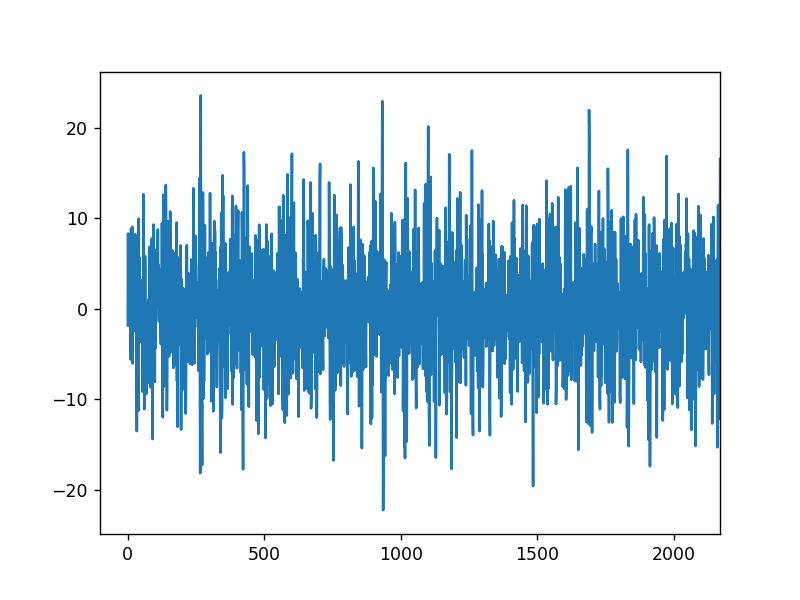

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [513]:
fc = 0.35  # Cut-off frequency of the butterworth filter
w = fc / (100 / 2) # Normalize the frequency
b, a = signal.butter(5, w, 'high')
filtered_data_butterworth = signal.filtfilt(b, a, data)
plt.figure()
plt.plot(filtered_data_butterworth)

<IPython.core.display.Javascript object>


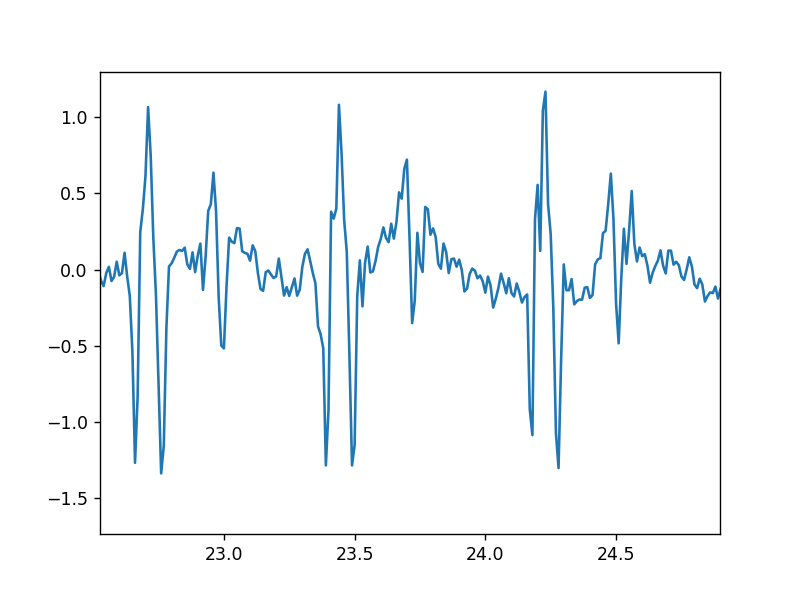

C:\Users\Utente\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [529]:
Fsig=np.fft.fft(Df['GyroX'])
freq=np.fft.fftfreq(d=1/log_freq, n=len(gyroxfreq))

%matplotlib notebook
#plt.plot(freq,np.abs(Fsig),'b-o', markersize=3)
#plt.xlim(-0.001,2)
Fsig[(freq<0.6) | (freq>40)]=0
new_sig = np.fft.ifft(Fsig)
plt.figure()
plt.plot(Df['Time'],new_sig)